In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Data set 1: Food inflation 
**Source: Trading Economics, URL: https://tradingeconomics.com/country-list/food-inflation**

In [2]:
df = pd.read_excel("Data sets/food_inflation.csv")
df.head()

,Country,Last,Previous,Reference,Unit
0,Afghanistan,-0.4,-1.5,2021-06-01,%
1,Albania,11.9,10.4,2022-05-01,%
2,Algeria,13.6,13.2,2022-03-01,%
3,Angola,30.4,33.1,2022-04-01,%
4,Argentina,64.2,62.1,2022-05-01,%


In [3]:
df.shape

(171, 5)

In [4]:
df.dtypes

Country              object
Last                float64
Previous            float64
Reference    datetime64[ns]
Unit                 object
dtype: object

In [5]:
df.describe()

,Last,Previous
count,171.000000,171.000000
mean,17.116901,15.873275
std,35.341205,34.775502
min,-6.580000,-10.670000
25%,6.100000,5.430000
50%,10.010000,9.000000
75%,16.950000,15.555000
max,364.000000,374.000000


**Looking at Singapore's food inflation rate in May vs Apr 2022**

In [6]:
df.query("Country == 'Singapore'")

,Country,Last,Previous,Reference,Unit
138,Singapore,4.5,4.1,2022-05-01,%


**Looking at US' food inflation rate in May vs Apr 2022**

In [7]:
df.query("Country == 'United States'")

,Country,Last,Previous,Reference,Unit
164,United States,10.1,9.4,2022-05-01,%


**Looking at China's food inflation rate in May vs Apr 2022**

In [8]:
df.query("Country == 'China'")

,Country,Last,Previous,Reference,Unit
34,China,2.3,1.9,2022-05-01,%


**Extracting food inflation data from the "Last" column for all 10 ASEAN countries**

In [9]:
asean = ["Singapore", "Malaysia", "Indonesia", "Thailand", "Philippines", "Cambodia", "Myanmar", "Laos", "Vietnam", "Brunei"]

df[df.Country.isin(asean)]

,Country,Last,Previous,Reference,Unit
23,Brunei,2.60,2.50,2022-02-01,%
27,Cambodia,5.68,5.87,2022-03-01,%
69,Indonesia,6.23,5.62,2022-06-01,%
84,Laos,8.20,5.70,2022-05-01,%
96,Malaysia,5.20,4.10,2022-05-01,%
108,Myanmar,12.40,10.80,2021-12-01,%
125,Philippines,4.90,3.80,2022-05-01,%
138,Singapore,4.50,4.10,2022-05-01,%
155,Thailand,6.18,4.83,2022-05-01,%
168,Vietnam,2.87,2.42,2022-06-01,%


**Highest food inflation rate was seen in Myanmar, but its data was last recorded in Dec 2021. To drop this row.**

In [10]:
asean_minus_myanmar = ["Singapore", "Malaysia", "Indonesia", "Thailand", "Philippines", "Cambodia", "Laos", "Vietnam", "Brunei"]

df[df.Country.isin(asean_minus_myanmar)]

,Country,Last,Previous,Reference,Unit
23,Brunei,2.60,2.50,2022-02-01,%
27,Cambodia,5.68,5.87,2022-03-01,%
69,Indonesia,6.23,5.62,2022-06-01,%
84,Laos,8.20,5.70,2022-05-01,%
96,Malaysia,5.20,4.10,2022-05-01,%
125,Philippines,4.90,3.80,2022-05-01,%
138,Singapore,4.50,4.10,2022-05-01,%
155,Thailand,6.18,4.83,2022-05-01,%
168,Vietnam,2.87,2.42,2022-06-01,%


**Mean food inflation rate for ASEAN (minus Myanmar) is 5.15%, median is 5.2%.**

**Highest = Laos,
Lowest = Vietnam**

**Note: Not all data have the same reference period.**

In [11]:
df[df.Country.isin(asean_minus_myanmar)].Last.describe()

count    9.000000
mean     5.151111
std      1.732018
min      2.600000
25%      4.500000
50%      5.200000
75%      6.180000
max      8.200000
Name: Last, dtype: float64

### Data set 2: Agriculture as a % of GDP
Source: EIU Viewpoint, URL: https://viewpoint-eiu-com.proxy.lib.sg/

In [14]:
df_agriculture = pd.read_csv("Data Sets/agriculture.csv")
df_agriculture.head()

,Series,Geography Code,Geography,Unit,Frequency,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Agriculture (% of GDP),AL,Albania,,Yearly,21.883,21.885,21.849,21.527,21.288,20.674,20.092,19.743,20.509,19.600,19.0
1,Agriculture (% of GDP),AM,Armenia,,Yearly,20.068,20.924,21.367,23.190,21.899,19.368,17.190,15.035,15.520,15.000,14.5
2,Agriculture (% of GDP),AU,Australia,,Yearly,3.060,3.078,2.962,2.870,2.769,2.810,2.614,2.218,2.267,2.845,2.5
3,Agriculture (% of GDP),AZ,Azerbaijan,,Yearly,5.665,5.626,5.341,5.643,5.969,6.220,6.410,6.714,7.157,6.900,7.0
4,Agriculture (% of GDP),BH,Bahrain,,Yearly,0.295,0.284,0.302,0.285,0.294,0.281,0.286,0.283,0.297,0.300,0.3


In [15]:
asean = ["Singapore", "Malaysia", "Indonesia", "Thailand", "Philippines", "Cambodia", "Myanmar", "Laos", "Vietnam", "Brunei"]

df_agriculture[df_agriculture.Geography.isin(asean)]

,Series,Geography Code,Geography,Unit,Frequency,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,Agriculture (% of GDP),BN,Brunei,,Yearly,0.723,0.730,0.785,0.838,0.829,0.805,0.792,0.751,0.851,1.011,0.8
23,Agriculture (% of GDP),ID,Indonesia,,Yearly,13.749,13.619,13.519,13.466,13.311,13.203,13.069,12.901,13.341,13.156,12.9
32,Agriculture (% of GDP),MY,Malaysia,,Yearly,9.083,8.845,8.518,8.210,7.576,7.594,7.240,7.062,7.291,7.058,6.8
35,Agriculture (% of GDP),MM,Myanmar,,Yearly,30.761,29.080,27.887,26.734,24.908,23.425,22.292,21.980,22.516,25.500,25.2
42,Agriculture (% of GDP),PH,Philippines,,Yearly,18.413,17.837,17.141,16.329,15.191,14.885,14.202,13.590,15.016,14.200,13.6
48,Agriculture (% of GDP),SG,Singapore,,Yearly,4.365,4.350,4.347,4.538,4.614,4.576,4.576,4.705,4.828,4.356,4.4
54,Agriculture (% of GDP),TH,Thailand,,Yearly,7.333,7.183,7.105,6.403,6.094,6.181,6.286,6.094,6.269,6.236,6.0
62,Agriculture (% of GDP),VN,Vietnam,,Yearly,16.319,15.864,15.468,14.810,14.112,13.569,13.122,12.482,12.438,12.478,12.9


**Laos' data is missing**

**Agricultural output contributes to >10% of The Philippines, Vietnam and Indonesia's GDP, but no clear trend between a country's agricultural output and food inflation rate, possibly due to other interventions such as currency rate adjustment.**

### Back to data set 1: Food inflation 
Source: Trading Economics, URL: https://tradingeconomics.com/country-list/food-inflation

**How is it like living in countries with food inflation rates at > 100% (Venezuela), >200% (Zimbabwe), >350% (Lebanon)???**

In [16]:
df.sort_values("Last", ascending=False).head(10)

,Country,Last,Previous,Reference,Unit
86,Lebanon,364.0,374.0,2022-05-01,%
170,Zimbabwe,225.0,155.0,2022-06-01,%
167,Venezuela,155.0,193.0,2022-05-01,%
159,Turkey,91.6,89.1,2022-05-01,%
146,Sri Lanka,80.1,57.4,2022-06-01,%
4,Argentina,64.2,62.1,2022-05-01,%
147,Suriname,60.9,68.3,2022-04-01,%
70,Iran,49.6,43.5,2022-05-01,%
48,Ethiopia,43.9,42.9,2022-05-01,%
151,Syria,39.1,23.1,2019-12-01,%


**Food price inflation in some advanced economies like Switzerland and China are still below 3% in May 2022.**

In [17]:
df.sort_values("Last", ascending=False).tail(10)

,Country,Last,Previous,Reference,Unit
23,Brunei,2.60,2.50,2022-02-01,%
34,China,2.30,1.90,2022-05-01,%
92,Macau,1.67,1.54,2022-05-01,%
150,Switzerland,1.10,-0.30,2022-05-01,%
19,Bolivia,0.90,-0.51,2022-05-01,%
136,Seychelles,0.20,-0.80,2022-05-01,%
144,South Sudan,0.08,-10.67,2022-04-01,%
0,Afghanistan,-0.40,-1.50,2021-06-01,%
16,Benin,-1.00,1.90,2022-04-01,%
88,Liberia,-6.58,-2.39,2021-11-01,%


**Checking the number of records from each time period**

In [18]:
df.Reference.value_counts()

2022-05-01    107
2022-04-01     27
2022-03-01     13
2022-06-01     11
2022-02-01      6
2021-12-01      4
2021-06-01      1
2021-11-01      1
2019-12-01      1
Name: Reference, dtype: int64

**Dropping rows with data from 2021 and earlier**

In [19]:
df["year"] = df.Reference.dt.year 
df_2022 = df.query("year == 2022")
df_2022.head()

,Country,Last,Previous,Reference,Unit,year
1,Albania,11.9,10.4,2022-05-01,%,2022
2,Algeria,13.6,13.2,2022-03-01,%,2022
3,Angola,30.4,33.1,2022-04-01,%,2022
4,Argentina,64.2,62.1,2022-05-01,%,2022
5,Armenia,14.5,14.3,2022-05-01,%,2022


<AxesSubplot:>

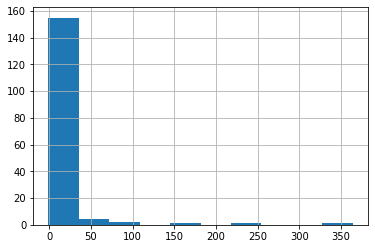

In [20]:
df_2022.Last.hist()

In [21]:
df_2022.describe()

,Last,Previous,year
count,164.000000,164.000000,164.0
mean,17.407073,16.187622,2022.0
std,35.953254,35.433760,0.0
min,-1.000000,-10.670000,2022.0
25%,6.195000,5.572500,2022.0
50%,10.055000,9.200000,2022.0
75%,17.000000,15.532500,2022.0
max,364.000000,374.000000,2022.0


### Data set 3: The World by Income (based on GNI per capita)
Source: World Bank, URL: https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html

In [23]:
df_income = pd.read_csv("Data Sets/country_by_income.csv")
df_income.head()

,Country,Income group,Region,Lending category,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,High income,Latin America & Caribbean,NaN,NaN,10360.0,11760.0,12230.0,13190.0,13990.0,...,22450.0,23520.0,24510.0,25350.0,26560.0,26840.0,27120.0,NaN,NaN,NaN
1,Afghanistan,Low income,South Asia,IDA,NaN,NaN,NaN,NaN,NaN,NaN,...,530.0,630.0,660.0,630.0,600.0,550.0,530.0,520.0,530.0,500.0
2,Angola,Lower middle income,Sub-Saharan Africa,IBRD,670.0,650.0,860.0,780.0,1380.0,1170.0,...,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2970.0,2230.0
3,Albania,Upper middle income,Europe & Central Asia,IBRD,730.0,730.0,760.0,650.0,410.0,280.0,...,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0,5210.0
4,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_income.shape

# More rows than the food inflation data

(217, 38)

### Merging data set 1 (food price inflation data - 2022) and data set 3 (the world by income)

In [25]:
merged = df_2022.merge(df_income, left_on='Country', right_on='Country')
merged.head()

,Country,Last,Previous,Reference,Unit,year,Income group,Region,Lending category,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Albania,11.9,10.4,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,730.0,...,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0,5210.0
1,Algeria,13.6,13.2,2022-03-01,%,2022,Lower middle income,Middle East & North Africa,IBRD,2810.0,...,4600.0,5170.0,5510.0,5490.0,4850.0,4370.0,3940.0,3980.0,4010.0,3550.0
2,Angola,30.4,33.1,2022-04-01,%,2022,Lower middle income,Sub-Saharan Africa,IBRD,670.0,...,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2970.0,2230.0
3,Argentina,64.2,62.1,2022-05-01,%,2022,Upper middle income,Latin America & Caribbean,IBRD,3590.0,...,10710.0,11870.0,12840.0,12330.0,12570.0,12220.0,13140.0,12370.0,11130.0,8930.0
4,Armenia,14.5,14.3,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,NaN,...,3530.0,3880.0,4110.0,4140.0,4010.0,3760.0,3950.0,4250.0,4680.0,4220.0


In [26]:
merged.shape

(141, 43)

In [27]:
merged = merged.rename(columns={"Income group": "income_group"})

In [28]:
merged.income_group.value_counts()

High income            49
Upper middle income    41
Lower middle income    36
Low income             15
Name: income_group, dtype: int64

In [29]:
merged.income_group.value_counts(normalize=True)*100

High income            34.751773
Upper middle income    29.078014
Lower middle income    25.531915
Low income             10.638298
Name: income_group, dtype: float64

In [30]:
# Looking at the mean food price inflation in countries by income groups
merged.groupby("income_group").Last.mean()

income_group
High income             9.150000
Low income             16.615333
Lower middle income    19.242778
Upper middle income    25.662927
Name: Last, dtype: float64

**Upper-middle-income countries have the highest average, while high-income countries have the lowest.**

<AxesSubplot:ylabel='income_group'>

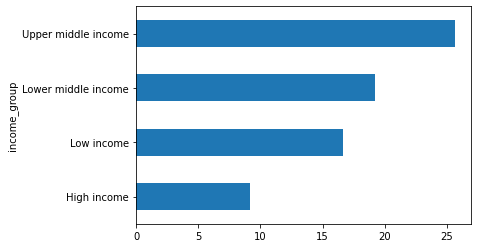

In [31]:
merged.groupby("income_group").Last.mean().plot(kind="barh")

In [32]:
merged.groupby("income_group").Last.median()

income_group
High income             8.80
Low income             13.60
Lower middle income     8.45
Upper middle income    13.80
Name: Last, dtype: float64

<AxesSubplot:ylabel='income_group'>

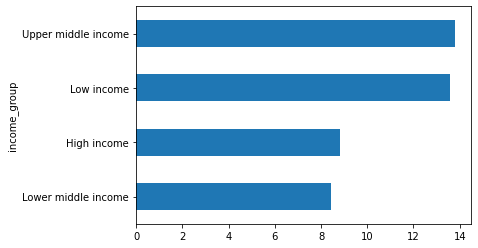

In [33]:
merged.groupby("income_group").Last.median().sort_values().plot(kind="barh")

**Taking a closer look at upper-middle-income countries**

**Huge range from China's 2.3% to Lebanon's 364%. The mean is skewed to the right by countries like Lebanon, Turkey, Argentina and Suriname.**

In [34]:
upper_middle = merged[merged.income_group == "Upper middle income"]

upper_middle.sort_values("Last", ascending=False)

,Country,Last,Previous,Reference,Unit,year,income_group,Region,Lending category,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
72,Lebanon,364.00,374.00,2022-05-01,%,2022,Upper middle income,Middle East & North Africa,IBRD,NaN,...,7560.0,7560.0,7640.0,7550.0,7280.0,7220.0,7470.0,7710.0,7420.0,5510.0
132,Turkey,91.60,89.10,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,1740.0,...,11310.0,11960.0,12600.0,12630.0,12030.0,11260.0,10970.0,10510.0,9690.0,9050.0
3,Argentina,64.20,62.10,2022-05-01,%,2022,Upper middle income,Latin America & Caribbean,IBRD,3590.0,...,10710.0,11870.0,12840.0,12330.0,12570.0,12220.0,13140.0,12370.0,11130.0,8930.0
124,Suriname,60.90,68.30,2022-04-01,%,2022,Upper middle income,Latin America & Caribbean,IBRD,2520.0,...,7920.0,8550.0,8950.0,9260.0,8890.0,6930.0,5930.0,5960.0,6340.0,5510.0
86,Moldova,30.20,27.00,2022-04-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,NaN,...,2730.0,3140.0,3620.0,3740.0,3300.0,3180.0,3330.0,3920.0,4580.0,4570.0
22,Bulgaria,22.80,21.30,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,2720.0,...,7220.0,7440.0,7590.0,7740.0,7450.0,7430.0,7640.0,8560.0,9570.0,9540.0
19,Bosnia and Herzegovina,22.70,20.60,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,NaN,...,5010.0,4990.0,5270.0,5300.0,5210.0,5130.0,5120.0,5750.0,6180.0,6090.0
47,Georgia,22.00,21.30,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,NaN,...,3520.0,4150.0,4530.0,4740.0,4410.0,4080.0,4040.0,4460.0,4690.0,4290.0
32,Colombia,21.60,26.17,2022-05-01,%,2022,Upper middle income,Latin America & Caribbean,IBRD,1240.0,...,6310.0,7290.0,7950.0,8200.0,7330.0,6460.0,5930.0,6260.0,6580.0,5780.0
88,Montenegro,20.60,19.00,2022-05-01,%,2022,Upper middle income,Europe & Central Asia,IBRD,NaN,...,7260.0,7000.0,7330.0,7320.0,7260.0,7090.0,7410.0,8450.0,9070.0,7900.0


**Taking a closer look at low-income countries**

**Most low-income countries are experiencing double-digit food price inflation.**

In [35]:
low = merged[merged.income_group == "Low income"]

low.sort_values("Last", ascending=False)

,Country,Last,Previous,Reference,Unit,year,income_group,Region,Lending category,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
43,Ethiopia,43.90,42.90,2022-05-01,%,2022,Low income,Sub-Saharan Africa,IDA,280.0,...,390.0,410.0,470.0,550.0,600.0,670.0,740.0,800.0,850.0,890.0
23,Burkina Faso,25.20,25.70,2022-05-01,%,2022,Low income,Sub-Saharan Africa,IDA,270.0,...,680.0,730.0,770.0,760.0,700.0,680.0,670.0,750.0,780.0,790.0
111,Rwanda,23.80,13.20,2022-05-01,%,2022,Low income,Sub-Saharan Africa,IDA,320.0,...,650.0,700.0,720.0,740.0,750.0,740.0,730.0,780.0,830.0,780.0
116,Sierra Leone,23.00,23.00,2022-04-01,%,2022,Low income,Sub-Saharan Africa,IDA,180.0,...,430.0,530.0,660.0,700.0,550.0,490.0,520.0,490.0,540.0,490.0
24,Burundi,22.90,19.30,2022-05-01,%,2022,Low income,Sub-Saharan Africa,IDA,260.0,...,230.0,250.0,260.0,260.0,260.0,270.0,280.0,280.0,280.0,270.0
78,Malawi,19.50,17.10,2022-04-01,%,2022,Low income,Sub-Saharan Africa,IDA,150.0,...,490.0,460.0,410.0,370.0,350.0,340.0,370.0,430.0,550.0,580.0
119,Somalia,14.74,11.92,2022-05-01,%,2022,Low income,Sub-Saharan Africa,IDA,150.0,...,NaN,NaN,NaN,NaN,290.0,290.0,290.0,310.0,320.0,310.0
130,Togo,13.60,19.10,2022-04-01,%,2022,Low income,Sub-Saharan Africa,IDA,310.0,...,610.0,590.0,620.0,640.0,640.0,670.0,720.0,880.0,920.0,920.0
90,Mozambique,13.51,10.25,2022-05-01,%,2022,Low income,Sub-Saharan Africa,IDA,NaN,...,540.0,600.0,670.0,690.0,640.0,530.0,470.0,460.0,490.0,460.0
52,Guinea,12.60,14.70,2022-04-01,%,2022,Low income,Sub-Saharan Africa,IDA,NaN,...,680.0,700.0,700.0,740.0,760.0,780.0,820.0,860.0,950.0,1020.0


**Taking a closer look at lower-middle-income countries**

**Huge range from Zimbabwe at 225% to Benin at -1%**

In [36]:
lower_middle = merged[merged.income_group == "Lower middle income"]

lower_middle.sort_values("Last", ascending=False)

,Country,Last,Previous,Reference,Unit,year,income_group,Region,Lending category,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
140,Zimbabwe,225.00,155.00,2022-06-01,%,2022,Lower middle income,Sub-Saharan Africa,Blend,700.0,...,920.0,1110.0,1210.0,1260.0,1280.0,1290.0,1390.0,1410.0,1200.0,1090.0
123,Sri Lanka,80.10,57.40,2022-06-01,%,2022,Lower middle income,South Asia,IBRD,430.0,...,2850.0,3360.0,3490.0,3640.0,3760.0,3810.0,3870.0,4040.0,4010.0,3720.0
2,Angola,30.40,33.10,2022-04-01,%,2022,Lower middle income,Sub-Saharan Africa,IBRD,670.0,...,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2970.0,2230.0
49,Ghana,30.10,26.60,2022-05-01,%,2022,Lower middle income,Sub-Saharan Africa,IDA,420.0,...,1380.0,1530.0,1840.0,1960.0,1950.0,1790.0,1870.0,2120.0,2210.0,2230.0
100,Pakistan,25.92,17.25,2022-06-01,%,2022,Lower middle income,South Asia,Blend,370.0,...,1030.0,1120.0,1210.0,1230.0,1260.0,1310.0,1400.0,1480.0,1410.0,1280.0
54,Haiti,25.90,25.50,2022-02-01,%,2022,Lower middle income,Latin America & Caribbean,IDA,340.0,...,1230.0,1300.0,1370.0,1410.0,1390.0,1330.0,1310.0,1360.0,1330.0,1250.0
134,Ukraine,23.60,22.40,2022-05-01,%,2022,Lower middle income,Europe & Central Asia,IBRD,NaN,...,3110.0,3500.0,3800.0,3560.0,2650.0,2310.0,2380.0,2800.0,3370.0,3540.0
97,Nigeria,19.50,18.37,2022-05-01,%,2022,Lower middle income,Sub-Saharan Africa,Blend,710.0,...,2180.0,2440.0,2690.0,2940.0,2820.0,2430.0,2090.0,1960.0,2030.0,2000.0
87,Mongolia,18.00,16.80,2022-05-01,%,2022,Lower middle income,East Asia & Pacific,IBRD,1520.0,...,2590.0,3650.0,4330.0,4210.0,3820.0,3500.0,3230.0,3630.0,3790.0,3670.0
96,Nicaragua,16.90,16.20,2022-05-01,%,2022,Lower middle income,Latin America & Caribbean,IDA,860.0,...,1570.0,1670.0,1740.0,1830.0,1890.0,1960.0,2030.0,1970.0,1900.0,1850.0


**Taking a closer look at high-income countries**

**Again, huge range from 0.2% in Seychelles to double-digit inflation in Lithuania, Hungary and many European countries, possibly exarcebated by the Russia invasion of Ukraine.** 

In [37]:
high = merged[merged.income_group == "High income"]

high.sort_values("Last", ascending=False)

,Country,Last,Previous,Reference,Unit,year,income_group,Region,Lending category,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
75,Lithuania,24.80,21.70,2022-05-01,%,2022,High income,Europe & Central Asia,NaN,NaN,...,3860.0,4090.0,4440.0,4660.0,5960.0,8550.0,15280.0,17460.0,19020.0,NaN
56,Hungary,19.40,16.20,2022-05-01,%,2022,High income,Europe & Central Asia,NaN,NaN,...,13250.0,13060.0,13500.0,13560.0,13250.0,13100.0,13190.0,15010.0,16530.0,NaN
71,Latvia,18.20,17.40,2022-05-01,%,2022,High income,Europe & Central Asia,NaN,NaN,...,18800.0,19820.0,21360.0,19190.0,16690.0,14790.0,14850.0,16540.0,17740.0,NaN
30,Chile,17.10,14.80,2022-05-01,%,2022,High income,Latin America & Caribbean,IBRD,1660.0,...,12340.0,14350.0,15160.0,14940.0,14130.0,13370.0,13270.0,14550.0,14990.0,13470.0
11,Barbados,17.00,4.20,2022-03-01,%,2022,High income,Latin America & Caribbean,NaN,6690.0,...,15050.0,15720.0,15660.0,15630.0,15740.0,15920.0,16070.0,16700.0,17380.0,14460.0
42,Estonia,17.00,14.60,2022-05-01,%,2022,High income,Europe & Central Asia,NaN,NaN,...,NaN,2780.0,18260.0,19000.0,18700.0,18430.0,18850.0,21340.0,23250.0,NaN
34,Croatia,15.20,12.80,2022-05-01,%,2022,High income,Europe & Central Asia,IBRD,NaN,...,14040.0,13440.0,13580.0,13260.0,12970.0,12380.0,12680.0,14080.0,14990.0,14190.0
36,Czech Republic,15.10,10.70,2022-05-01,%,2022,High income,Europe & Central Asia,NaN,NaN,...,19460.0,19440.0,19410.0,18900.0,18370.0,17670.0,18310.0,20520.0,21930.0,NaN
106,Poland,13.50,12.70,2022-05-01,%,2022,High income,Europe & Central Asia,IBRD,NaN,...,12890.0,13160.0,13390.0,13560.0,13310.0,12720.0,12730.0,14150.0,15350.0,15270.0
118,Slovenia,12.51,10.85,2022-06-01,%,2022,High income,Europe & Central Asia,NaN,NaN,...,24630.0,23260.0,23240.0,23620.0,22270.0,21790.0,22140.0,24610.0,25940.0,NaN


In [39]:
map = merged[["Country", "Last", "income_group"]]
map.head()
map.sort_values("Last").head(10)

,Country,Last,income_group
15,Benin,-1.00,Lower middle income
121,South Sudan,0.08,Low income
115,Seychelles,0.20,High income
18,Bolivia,0.90,Lower middle income
126,Switzerland,1.10,High income
31,China,2.30,Upper middle income
98,Norway,2.60,High income
138,Vietnam,2.87,Lower middle income
109,Qatar,3.59,High income
44,Fiji,3.60,Upper middle income


**Saving the new, simplified dataframe as a csv for visualization**

In [40]:
map.to_csv('map.csv', index=False)

In [41]:
df_2022.to_csv("df_2022.csv", index=False)
df_2022.shape

(164, 6)

**Time to work on the story!**

Revision based on Soma's feedback - to have fewer buckets in heat map 

In [ ]:
!pip install jenkspy # to find natural breaks in data

In [42]:
import jenkspy

In [43]:
breaks = jenkspy.jenks_breaks(df['Last'], nb_class=4)
print(breaks)

[-6.58, 30.4, 91.6, 225.0, 364.0]


In [45]:
merged.to_csv('merged.csv', index=False)